In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
M = 2 #number of states
K = 6 #number of possible emissions
L = 300 #length of sequence
#beginning distribution is solution for system of equations: 
#(x,y)transition_matrix = x
#x + y = 1
pi = np.array([2.0/3, 1.0/3])
transition_matrix = np.array([
    [0.95, 0.05],
    [0.1, 0.9]]
)
emission_matrix = np.array([
    [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6],
    [1.0/10, 1.0/10, 1.0/10, 1.0/10, 1.0/10, 5.0/10]]
)

In [3]:
dices = [0, 1]
score = [0, 1, 2, 3, 4, 5]
hidden_sequence, observed_sequence = np.zeros(L), np.zeros(L)
hidden_sequence[0] = np.random.choice(dices, 1, p = pi)
for i in range(1, L):
    hidden_sequence[i] = np.random.choice(dices, 1, p = transition_matrix[int(hidden_sequence[i-1])])
    observed_sequence[i] = np.random.choice(score, 1, p = emission_matrix[int(hidden_sequence[i-1])])

In [4]:
hidden_sequence

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1.

In [5]:
observed_sequence

array([0., 1., 3., 4., 5., 3., 1., 0., 5., 0., 5., 4., 1., 0., 4., 4., 1.,
       1., 5., 4., 3., 3., 2., 1., 5., 5., 5., 2., 2., 3., 3., 0., 4., 0.,
       1., 0., 4., 0., 0., 0., 0., 5., 5., 2., 4., 1., 5., 0., 5., 3., 2.,
       3., 1., 2., 5., 0., 2., 3., 3., 2., 0., 2., 5., 3., 2., 5., 1., 5.,
       0., 5., 5., 4., 1., 5., 0., 3., 2., 5., 5., 5., 2., 3., 5., 4., 5.,
       5., 5., 5., 0., 3., 5., 1., 4., 1., 0., 5., 3., 1., 0., 5., 3., 1.,
       5., 4., 1., 2., 1., 5., 2., 4., 0., 2., 2., 2., 5., 1., 2., 0., 5.,
       4., 3., 0., 2., 5., 0., 5., 4., 3., 2., 5., 0., 3., 3., 3., 3., 2.,
       2., 5., 5., 0., 5., 3., 1., 1., 4., 4., 1., 3., 3., 4., 3., 0., 2.,
       1., 5., 5., 3., 0., 4., 5., 0., 3., 0., 1., 0., 0., 5., 5., 0., 0.,
       4., 1., 0., 3., 0., 3., 1., 0., 4., 2., 5., 0., 3., 0., 1., 0., 1.,
       0., 1., 2., 4., 4., 2., 5., 4., 3., 3., 1., 1., 5., 5., 4., 5., 1.,
       4., 2., 2., 0., 4., 1., 5., 5., 5., 0., 1., 4., 2., 4., 4., 2., 5.,
       1., 2., 3., 2., 5.

In [6]:
def viterbi(obs_seq,pi, A, B):
    N = transition_matrix.shape[0]
    delta = np.zeros((L, N))
    psi = np.zeros((L, N))
    delta[0] = pi*emission_matrix[:,int(observed_sequence[0])]
    for l in range(1, L):
        for j in range(N):
            delta[l,j] = np.max(delta[l-1]*A[:,j]) * B[j, int(observed_sequence[l])]
            psi[l,j] = np.argmax(delta[l-1]*A[:,j])

    states = np.zeros(L, dtype=np.int32)
    states[L-1] = np.argmax(delta[L-1])
    for l in range(L-2, -1, -1):
        states[l] = psi[l+1, states[l+1]]
    return states

In [7]:
viterbi_path=viterbi(observed_sequence, pi, transition_matrix, emission_matrix)
viterbi_path

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

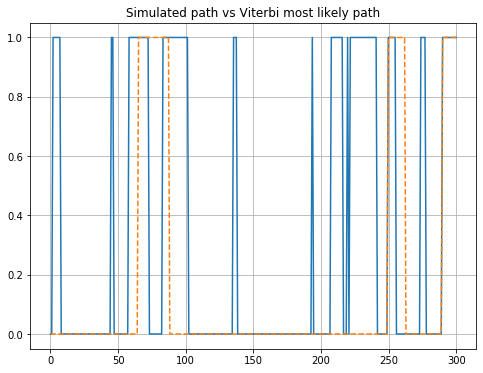

In [8]:
x = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(x, hidden_sequence, ls ='-')
ax.plot(x, viterbi_path, ls ='--')
plt.title('Simulated path vs Viterbi most likely path')
plt.grid()
plt.show()

In [9]:
#forward algorithm
def forward(obs, pi, trans, emis):
    forw = np.zeros((L, M))
    forw[0] = pi*emis[:,int(obs[0])]
    for l in range(1, L):
        forw[l] = np.dot(forw[l-1],trans) * emis[:, int(obs[l])]
    forw_prob = forw[-1].sum()
    return forw, forw_prob

In [10]:
forw, forw_prob = forward(observed_sequence, pi, transition_matrix, emission_matrix)
forw_prob

3.7575170855262705e-231

In [11]:
#backward algorithm
def backward(obs, trans, emis):
    back = np.zeros((M,L))
    back[:,-1:] = 1
    for l in reversed(range(L-1)):
        for m in range(M):
            back[m,l] = np.sum(back[:,l+1] * trans[m,:] * emis[:,int(obs[l+1])])
    back_prob = np.sum(pi * emis[:, int(obs[0])] * back[:,0])
    return back, back_prob

In [12]:
back, back_prob = backward(observed_sequence, transition_matrix, emission_matrix)
back_prob

3.757517085526273e-231

In [13]:
#posterior probabilities
posterior_prob = np.multiply(forw,back.T) / forw_prob
posterior_prob

array([[0.89070736, 0.10929264],
       [0.90323854, 0.09676146],
       [0.89912002, 0.10087998],
       [0.87689741, 0.12310259],
       [0.82872307, 0.17127693],
       [0.85267227, 0.14732773],
       [0.85299966, 0.14700034],
       [0.82982085, 0.17017915],
       [0.77495056, 0.22504944],
       [0.79835446, 0.20164554],
       [0.79309325, 0.20690675],
       [0.87127532, 0.12872468],
       [0.91377889, 0.08622111],
       [0.93561357, 0.06438643],
       [0.94448999, 0.05551001],
       [0.94354274, 0.05645726],
       [0.93243733, 0.06756267],
       [0.907252  , 0.092748  ],
       [0.85909289, 0.14090711],
       [0.87937759, 0.12062241],
       [0.8793694 , 0.1206306 ],
       [0.85906544, 0.14093456],
       [0.81129561, 0.18870439],
       [0.71919062, 0.28080938],
       [0.55022476, 0.44977524],
       [0.51221357, 0.48778643],
       [0.55861196, 0.44138804],
       [0.74623521, 0.25376479],
       [0.85062802, 0.14937198],
       [0.90865536, 0.09134464],
       [0.

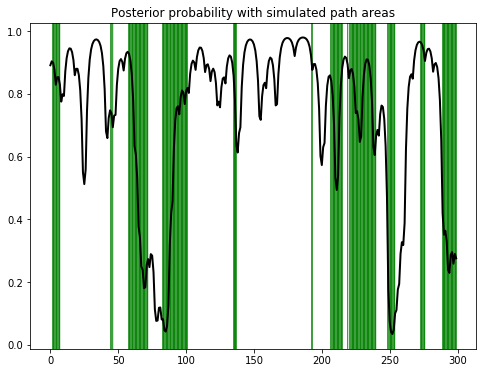

In [14]:
#green area - wrong dice, white area - right dice
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(L):
    if hidden_sequence[i] == 0:
        plt.axvline(x = i, color = 'white')
    else:
        plt.axvline(x = i, color = 'green')
plt.plot(range(L), posterior_prob[:,0], color = 'black', linewidth = 2)
plt.title('Posterior probability with simulated path areas')
plt.show()

In [15]:
#initialization (assign random values)
transition_matrix_new = np.array([
    [5.0/10, 5.0/10],
    [4.0/10, 6.0/10]]
)
emission_matrix_new = np.array([
    [4.0/10, 1.0/5, 1.0/10, 1.0/10, 1.0/10, 1.0/10],
    [4.0/10, 1.0/5, 1.0/10, 1.0/10, 1.0/10, 1.0/10]]
)
pi_new = np.array([5.0/10, 5.0/10])

In [16]:
#forward algorithm for sequence x (observed_sequence)
forw, forw_prob = forward(observed_sequence, pi_new, transition_matrix_new, emission_matrix_new)
forw_prob

2.854495385411965e-255

In [17]:
#backward algorithm for sequence x (observed_sequence)
back, back_prob = backward(observed_sequence, transition_matrix_new, emission_matrix_new)
back_prob

2.8544953854119686e-255

In [30]:
#parameter for transition matrix
def model_param_a(obs, trans, emis, forw, back):
    A = np.zeros((M, M))
    a = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            for k in range(1, L - 1):
                A[i, j] = np.sum(forw[k, i] * trans[i, j] * emis[j, int(obs[i])] * back[j, k + 1])
    A = A / back_prob
    for i in range(M):
        for j in range(M):
            a[i, j] = A[i, j] / np.sum(A[i])
    return a

In [32]:
model_param_a(observed_sequence, transition_matrix_new, emission_matrix_new, forw, back)

array([[0.5, 0.5],
       [0.4, 0.6]])

In [34]:
#parameter for emission matrix
def model_param_e(obs, trans, emis, forw, back):
    E = np.zeros((M, K))
    e = np.zeros((M, K))
    for i in range(M):
        for j in range(K):
            for k in range(L):
                if obs[k] == j + 1:
                    E[i, j] = np.sum(forw[k, i] * back[i, k])
    for i in range(M):
        for j in range(K):
            e[i, j] = E[i, j] / np.sum(E[i])
    return e

In [35]:
model_param_e(observed_sequence, transition_matrix_new, emission_matrix_new, forw, back)

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0. ]])